## QUESTION 1


The null hypothesis is President​ Trump's belief that voter fraud had occurred. The alternative hypothesis is that no voter fraud had occurred. If we cannot prove the alternative​ hypothesis, then his belief will​ remain, but it​ hasn't been​ proven, even with the lack of contradictory evidence

## QUESTION 2

H_0: The mean waiting time for the population is at least 10 minutes.   
H_1​: The mean waiting time for the population is less than 10 minutes.



H_0: The mean weekly usage for the population is at most 2 rides.
H_1​: The mean weekly usage for the population is greater than 2 rides.

## QUESTION 3


The price of a certain combo meal at different franchises of a national fast food company varies from​ $5.00 to ​$17.34 and has a known standard deviation of ​$2.18. A sample of 26 students in an online course that includes students across the country stated that their average price is ​$6.00. The students have also stated that they are generally unwilling to pay more than ​$6.75 for this meal. Formulate and conduct a hypothesis test to determine if you can conclude that the population mean is less than ​$6.75. Use a level of significance of 0.05.


Is there sufficient evidence at the 0.05 level of significance that the population mean is less than ​$6.75​?

H 0 : 𝜇 ≥ 6.75

𝐻 1 : μ < 6.75

In [3]:
import numpy as np
from scipy import stats

# Given data (in the order they appear in the question)
population_std = 2.18      # Known population standard deviation
sample_size = 26           # Sample size
sample_mean = 6.00         # Sample mean reported by students
population_mean = 6.75     # Claimed threshold for unwillingness to pay
alpha = 0.05               # Significance level

# Calculate the z-score (test statistic)
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

# Critical value for a left-tailed test at α = 0.05
critical_value = stats.norm.ppf(alpha)

# Calculate p-value for the left-tailed test
p_value = stats.norm.cdf(z_score)

print(f"Test Statistic (z-score): {z_score:.3f}")
print(f"Critical Value (z-critical): {critical_value:.3f}")
print(f"p-value: {p_value:.4f}")

# Decision rule
if z_score < critical_value:
    print("Reject H₀: There is sufficient evidence that the population mean price is less than $6.75.")
else:
    print("Fail to Reject H₀: There is not enough evidence that the population mean price is less than $6.75.")


Test Statistic (z-score): -1.754
Critical Value (z-critical): -1.645
p-value: 0.0397
Reject H₀: There is sufficient evidence that the population mean price is less than $6.75.


## QUESTION 4

H 0: π≥0.7

H 1: π<0.7

In [12]:
import numpy as np
from scipy import stats

# Given values from the question
x = 17                # Number of risk-averse investors
n = 29                # Sample size
p0 = 0.60
alpha = 0.05         # Significance level
sample_proportion = x / n   # Sample proportion p-hat
hypothesized_proportion = p0  # p0

# Calculate the standard error for the sampling distribution of p-hat
standard_error = np.sqrt((hypothesized_proportion * (1 - hypothesized_proportion)) / n)

# Calculate the z-test statistic
z_value = (sample_proportion - hypothesized_proportion) / standard_error

# Round for presentation
print(f"Sample proportion (p̂): {sample_proportion:.4f}")
print(f"Z-test statistic: {z_value:.2f}")


Sample proportion (p̂): 0.5862
Z-test statistic: -0.15


In [13]:
# Calculate the p-value for the Z-test statistic
# Since it's a left-tailed test, we use the CDF (cumulative distribution function) for the Z-value
from scipy.stats import norm
p_value_proportion = norm.cdf(z_value)

# Round the p-value to three decimal places
p_value_proportion_rounded = round(p_value_proportion, 3)

print(p_value_proportion_rounded)


0.44


In [15]:

p_hat = x / n               # sample proportion
# Decision logic (dynamic conclusion)
if p_value_proportion_rounded < alpha:
    comparison = "less than"
    decision = "reject"
    evidence = "sufficient"
else:
    comparison = "greater than"
    decision = "do not reject"
    evidence = "insufficient"

# Print numeric results and the dynamic conclusion
print(f"Sample proportion (p̂) = {p_hat:.4f}")
print(f"Z-test statistic = {z_value:.4f}")
print(f"p-value (left-tailed) = {p_value_proportion_rounded:.4f}")
print()
print(f"The p-value is {comparison} the chosen value of alpha, so {decision} the null hypothesis.")
print(f"There is {evidence} evidence to conclude that the proportion of investors who are risk-averse is not at least {p0:.2f}.")

Sample proportion (p̂) = 0.5862
Z-test statistic = -0.1516
p-value (left-tailed) = 0.4400

The p-value is greater than the chosen value of alpha, so do not reject the null hypothesis.
There is insufficient evidence to conclude that the proportion of investors who are risk-averse is not at least 0.60.


## Question 5

H_0 : π ≥ 0.02

𝐻_1 : π < 0.02

In [19]:
import math
from scipy.stats import norm

data = """
Sample\tRooms Inspected\tNonconforming Rooms\tFraction Nonconforming
1\t100\t3\t0.03
2\t100\t2\t0.02
3\t100\t0\t0.00
4\t100\t1\t0.01
5\t100\t3\t0.03
6\t100\t6\t0.06
7\t100\t3\t0.03
8\t100\t7\t0.07
9\t100\t1\t0.01
10\t100\t4\t0.04
11\t100\t1\t0.01
12\t100\t2\t0.02
13\t100\t1\t0.01
14\t100\t4\t0.04
15\t100\t4\t0.04
16\t100\t2\t0.02
17\t100\t1\t0.01
18\t100\t3\t0.03
19\t100\t5\t0.05
20\t100\t3\t0.03
21\t100\t3\t0.03
22\t100\t4\t0.04
23\t100\t2\t0.02
24\t100\t0\t0.00
25\t100\t2\t0.02
"""

# --- Parse the data string and aggregate ---
lines = [ln.strip() for ln in data.strip().splitlines()]
rows = []
for ln in lines[1:]:  # skip header
    parts = ln.split()
    rooms = int(parts[1])
    nonconf = int(parts[2])
    rows.append((rooms, nonconf))

total_nonconforming = sum(r[1] for r in rows)
total_rooms = sum(r[0] for r in rows)

# --- Test parameters ---
p0 = 0.02       # hypothesized proportion
alpha = 0.05    # significance level

# --- Sample stats ---
p_hat = total_nonconforming / total_rooms
se = math.sqrt(p0 * (1 - p0) / total_rooms)
z_stat = (p_hat - p0) / se

# left-tailed test p-value
p_value = norm.cdf(z_stat)

# --- Dynamic selection logic ---
# compare p-value to alpha
if p_value < alpha:
    comparison_choice = "less than"
    decision_choice = "reject"
    evidence_choice = "sufficient"
else:
    comparison_choice = "greater than"
    decision_choice = "do not reject"
    evidence_choice = "insufficient"

# --- Output ---
print("Computed results:")
print(f"  Z test statistic = {z_stat:.2f}")
print(f"  p-value (left-tailed) = {p_value:.3f}")
print()
print("State the conclusion.")
print("The p-value is")
print(f"▼ {comparison_choice}")
print("the chosen value of alpha, so")
print(f"▼ {decision_choice}")
print("the null hypothesis. There is")
print(f"▼ {evidence_choice}")
print("evidence to conclude that the proportion of nonconforming rooms will be less than 2%.\n")

# Also print the full sentence for convenience
full_sentence = (
    f"The p-value is {comparison_choice} the chosen value of alpha, so {decision_choice} the null hypothesis. "
    f"There is {evidence_choice} evidence to conclude that the proportion of nonconforming rooms will be less than 2%."
)
print("Full conclusion:")
print(full_sentence)


Computed results:
  Z test statistic = 2.43
  p-value (left-tailed) = 0.992

State the conclusion.
The p-value is
▼ greater than
the chosen value of alpha, so
▼ do not reject
the null hypothesis. There is
▼ insufficient
evidence to conclude that the proportion of nonconforming rooms will be less than 2%.

Full conclusion:
The p-value is greater than the chosen value of alpha, so do not reject the null hypothesis. There is insufficient evidence to conclude that the proportion of nonconforming rooms will be less than 2%.


# Question 6

In [90]:
import pandas as pd

# Data from Excel analysis
data = {
    "mean_female": 5.8,
    "mean_male": 7.7,
    "var_female": 6.078,
    "var_male": 20.509,
    "n_female": 10,
    "n_male": 10,
    "df": 14,
    "t_stat": -1.17,
    "p_one_tail": 0.132,
    "t_critical_one_tail": 1.76,
    "p_two_tail": 0.263,
    "t_critical_two_tail": 2.14
}

alpha = 0.05  # significance level

# Function to generate conclusions dynamically
def hypothesis_test_results(test_type, t_stat, t_critical, p_value):
    if test_type == "upper one-tailed":
        conclusion = "Fail to reject" if t_stat <= t_critical else "Reject"
        evidence = "insufficient" if t_stat <= t_critical else "sufficient"
        interpretation = "greater than"
    elif test_type == "lower one-tailed":
        conclusion = "Fail to reject" if t_stat >= t_critical else "Reject"
        evidence = "insufficient" if t_stat >= t_critical else "sufficient"
        interpretation = "less than"
    elif test_type == "two-tailed":
        conclusion = "Fail to reject" if abs(t_stat) <= t_critical else "Reject"
        evidence = "insufficient" if abs(t_stat) <= t_critical else "sufficient"
        interpretation = "differs from"
    else:
        raise ValueError("Invalid test type")
    
    return {
        "Test Type": test_type.title(),
        "Critical Value": t_critical,
        "p-value": p_value,
        "Conclusion": conclusion,
        "Evidence/Interpretation": f"There is {evidence} evidence to conclude that the mean number of movies watched each month for females is {interpretation} the mean for males."
    }

# Prepare all three test results
tests = [
    hypothesis_test_results(
        "upper one-tailed",
        data["t_stat"],
        data["t_critical_one_tail"],
        1 - data["p_one_tail"]  # for upper tail, p-value = 1 - P(T <= t)
    ),
    hypothesis_test_results(
        "lower one-tailed",
        data["t_stat"],
        -data["t_critical_one_tail"],
        data["p_one_tail"]
    ),
    hypothesis_test_results(
        "two-tailed",
        data["t_stat"],
        data["t_critical_two_tail"],
        data["p_two_tail"]
    )
]

# Convert to DataFrame for a clean table
df_results = pd.DataFrame(tests)

# Display the table
print(df_results.to_string(index=False))


       Test Type  Critical Value  p-value     Conclusion                                                                                                                      Evidence/Interpretation
Upper One-Tailed            1.76    0.868 Fail to reject There is insufficient evidence to conclude that the mean number of movies watched each month for females is greater than the mean for males.
Lower One-Tailed           -1.76    0.132 Fail to reject    There is insufficient evidence to conclude that the mean number of movies watched each month for females is less than the mean for males.
      Two-Tailed            2.14    0.263 Fail to reject There is insufficient evidence to conclude that the mean number of movies watched each month for females is differs from the mean for males.


# Question 7

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, f

# Write the data to a text file (data.txt) for reading
data = """Gender PriorExp College Length
0	1	0	0.28
0	0	1	0.31
1	1	1	0.34
1	0	0	0.49
0	1	0	0.61
1	1	0	0.64
1	1	0	0.66
0	1	0	0.73
0	1	0	0.84
1	0	0	0.86
1	1	0	0.95
0	0	1	0.97
0	1	0	0.98
0	1	0	1.03
1	0	0	1.01
0	0	1	1.01
1	0	1	1.09
1	0	0	1.14
0	0	0	1.16
1	0	1	1.19
0	0	0	1.22
0	1	1	1.26
1	0	0	1.28
1	0	1	1.34
0	0	1	1.35
1	0	1	1.40
1	0	1	1.44
1	0	0	1.45
0	0	0	1.50
0	1	1	1.61
0	0	0	1.69
1	0	1	1.76
1	1	0	1.79
1	1	1	1.79
0	0	0	1.76
1	0	0	1.77
0	0	1	1.88
1	0	0	1.87
0	1	0	1.98
0	0	0	1.95
1	0	0	2.05
0	0	1	2.06
0	1	0	2.05
0	0	1	2.08
1	0	0	2.16
1	1	1	2.17
0	1	1	2.12
1	1	1	2.16
0	1	0	2.16
0	0	0	2.15
0	1	1	2.20
1	0	1	2.15
1	0	0	2.19
0	0	0	2.31
1	1	0	2.52
1	0	0	2.57
0	0	0	2.51
1	1	0	2.89
0	1	0	2.91
0	1	0	2.94
0	0	0	3.07
0	1	0	3.06
1	1	0	3.10
1	0	0	3.32
0	0	0	3.28
1	0	0	3.51
1	1	0	3.58
0	0	0	4.03
0	0	0	4.42
0	0	0	7.04
"""
with open("data.txt", "w") as file:
    file.write(data)

# Load the data
df = pd.read_csv("data.txt", sep="\s+", skiprows=1,
                 names=["Gender","PriorExp","College","Length"])

alpha = 0.05

# Part (a): Compare means (males vs females)
print("""
H₀: μ₁ - μ₂ =ᴺ 0⃗
H₁: μ₁ - μ₂ ≠ᴺ 0⃗
""")
males = df[df["Gender"] == 1]["Length"]
females = df[df["Gender"] == 0]["Length"]
t_gender, p_gender = ttest_ind(males, females, equal_var=True)
print("Part (a) - Gender (males vs females):")
print("H0: μ1 - μ2 = 0; H1: μ1 - μ2 ≠ 0")
print(f"t = {t_gender:.2f},  p = {p_gender:.3f}")
print("Conclusion:", "do not reject H0" if p_gender > alpha else "reject H0")
print()

print("""
H₀: μ₁ - μ₂ =ᴺ 0⃗
H₁: μ₁ - μ₂ ≠ᴺ 0⃗
""")
# Part (b): Compare means (no prior experience vs prior experience)
no_exp = df[df["PriorExp"] == 0]["Length"]
yes_exp = df[df["PriorExp"] == 1]["Length"]
t_exp, p_exp = ttest_ind(no_exp, yes_exp, equal_var=True)
print("Part (b) - Prior Experience (no vs yes):")
print("H0: μ1 - μ2 = 0; H1: μ1 - μ2 ≠ 0")
print(f"t = {t_exp:.2f},  p = {p_exp:.3f}")
print("Conclusion:", "do not reject H0" if p_exp > alpha else "reject H0")
print()

# Part (c): Compare means (college degree vs no degree)
print("""
H₀: μ₁ - μ₂ =ᴺ 0⃗
H₁: μ₁ - μ₂ ≠ᴺ 0⃗
""")
deg = df[df["College"] == 1]["Length"]
nodeg = df[df["College"] == 0]["Length"]
t_deg, p_deg = ttest_ind(deg, nodeg, equal_var=True)
print("Part (c) - College Degree (yes vs no):")
print("H0: μ1 - μ2 = 0; H1: μ1 - μ2 ≠ 0")
print(f"t = {t_deg:.2f},  p = {p_deg:.3f}")
print("Conclusion:", "do not reject H0" if p_deg > alpha else "reject H0")
print()

# Part (d): Test equality of variances (Gender, Experience, Degree)
#  - If variances differ, use Welch's t-test.

# Gender variances (male vs female)
print("[Part D] ")
print("""
H₀: σ₁² − σ₂² = 0
H₁: σ₁² − σ₂² ≠ 0
""")
var_male = males.var(ddof=1)
var_female = females.var(ddof=1)
F_gender = var_male/var_female
df1, df2 = len(males)-1, len(females)-1
p_var_gender = f.cdf(F_gender, df1, df2) if F_gender < 1 else 1 - f.cdf(F_gender, df1, df2)
print("Variance test (Gender):")
print(f"F = {F_gender:.2f},  one-tail p = {p_var_gender:.3f}")
if p_var_gender < alpha/2:
    print(" -> Reject H0: variances differ")
    t_gender_w, p_gender_w = ttest_ind(males, females, equal_var=False)
    print(f"Welch t = {t_gender_w:.2f}, \n p = {p_gender_w:.3f}")
    print("Welch conclusion:", "reject H0" if p_gender_w < alpha else "do not reject H0")
else:
    print(" -> Do not reject H0: variances equal")
print()

# Experience variances (no vs yes)
var_no = no_exp.var(ddof=1)
var_yes = yes_exp.var(ddof=1)
F_exp = var_no/var_yes
df1, df2 = len(no_exp)-1, len(yes_exp)-1
p_var_exp = f.cdf(F_exp, df1, df2) if F_exp < 1 else 1 - f.cdf(F_exp, df1, df2)
print("Variance test (Prior Experience):")
print(f"F = {F_exp:.2f},  one-tail p = {p_var_exp:.3f}")
if p_var_exp < alpha/2:
    print(" -> Reject H0: variances differ")
    t_exp_w, p_exp_w = ttest_ind(no_exp, yes_exp, equal_var=False)
    print(f"Welch t = {t_exp_w:.2f}, p = {p_exp_w:.3f}")
    print("Welch conclusion:", "reject H0" if p_exp_w < alpha else "do not reject H0")
else:
    print(" -> Do not reject H0: variances equal (equal variance assumption valid)")
print()

# College degree variances (yes vs no)
var_deg = deg.var(ddof=1)
var_nodeg = nodeg.var(ddof=1)
F_deg = var_deg/var_nodeg
df1, df2 = len(deg)-1, len(nodeg)-1
p_var_deg = f.cdf(F_deg, df1, df2) if F_deg < 1 else 1 - f.cdf(F_deg, df1, df2)
print("Variance test (College Degree):")
print(f"F = {F_deg:.2f},  one-tail p = {p_var_deg:.3f}")
if p_var_deg < alpha/2:
    print(" -> Reject H0: variances differ")
    t_deg_w, p_deg_w = ttest_ind(deg, nodeg, equal_var=False)
    print(f"Welch t = {t_deg_w:.2f}, p = {p_deg_w:.3f}")
    print("Welch conclusion:", "reject H0" if p_deg_w < alpha else "do not reject H0")
else:
    print(" -> Do not reject H0: variances equal (equal variance assumption valid)")



H₀: μ₁ - μ₂ =ᴺ 0⃗
H₁: μ₁ - μ₂ ≠ᴺ 0⃗

Part (a) - Gender (males vs females):
H0: μ1 - μ2 = 0; H1: μ1 - μ2 ≠ 0
t = -0.90,  p = 0.373
Conclusion: do not reject H0


H₀: μ₁ - μ₂ =ᴺ 0⃗
H₁: μ₁ - μ₂ ≠ᴺ 0⃗

Part (b) - Prior Experience (no vs yes):
H0: μ1 - μ2 = 0; H1: μ1 - μ2 ≠ 0
t = 0.86,  p = 0.392
Conclusion: do not reject H0


H₀: μ₁ - μ₂ =ᴺ 0⃗
H₁: μ₁ - μ₂ ≠ᴺ 0⃗

Part (c) - College Degree (yes vs no):
H0: μ1 - μ2 = 0; H1: μ1 - μ2 ≠ 0
t = -1.94,  p = 0.056
Conclusion: do not reject H0

[Part D] 

H₀: μ₁ - μ₂ =ᴺ 0⃗
H₁: μ₁ - μ₂ ≠ᴺ 0⃗

Variance test (Gender):
F = 0.46,  one-tail p = 0.014
 -> Reject H0: variances differ
Welch t = -0.92, 
 p = 0.363
Welch conclusion: do not reject H0

Variance test (Prior Experience):
F = 1.60,  one-tail p = 0.101
 -> Do not reject H0: variances equal (equal variance assumption valid)

Variance test (College Degree):
F = 0.21,  one-tail p = 0.000
 -> Reject H0: variances differ
Welch t = -2.50, p = 0.015
Welch conclusion: reject H0


<>:81: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:81: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
C:\Users\brett\AppData\Local\Temp\ipykernel_9756\931629053.py:81: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
  df = pd.read_csv("data.txt", sep="\s+", skiprows=1,


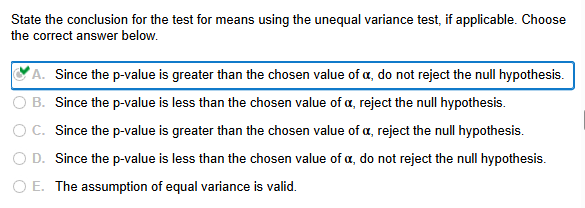

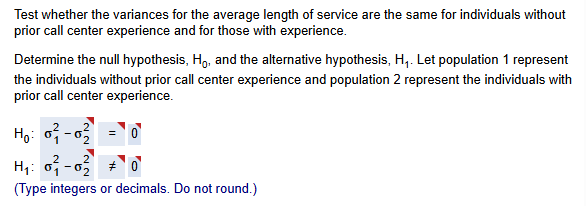

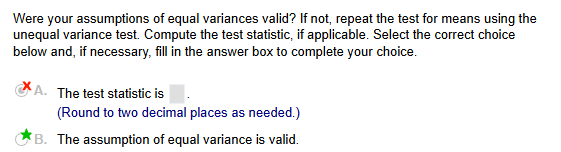

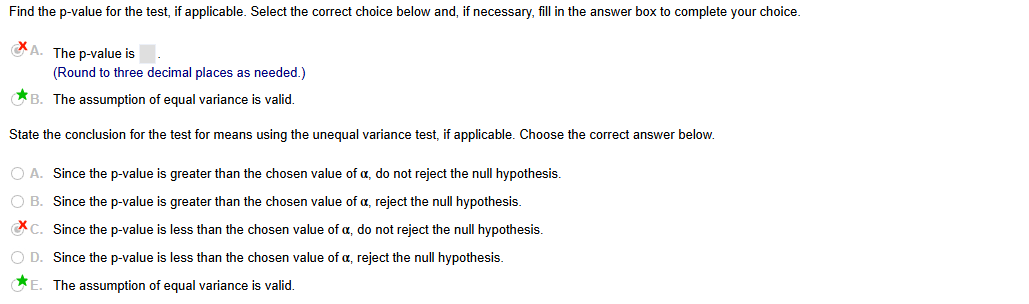

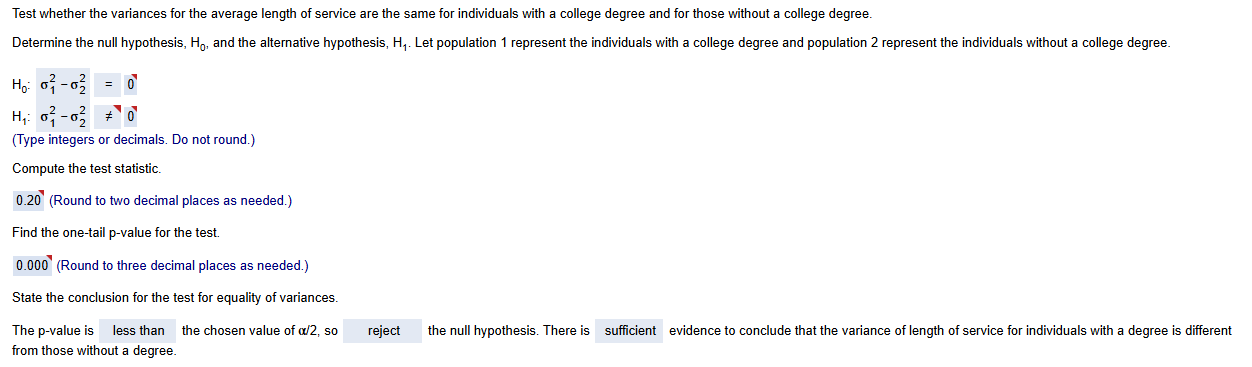

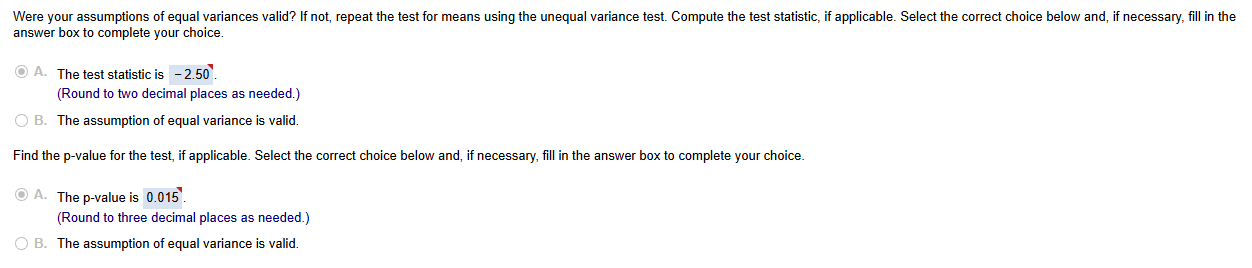

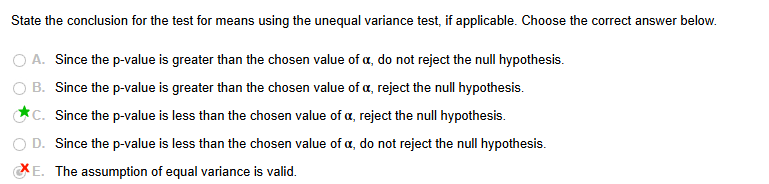

# Question 8

In [84]:
# I'll compute the pooled-variance (equal-variance) two-sample t-statistic from the data you provided
# and print the t-statistic rounded to two decimal places.

import re, math
from statistics import mean, stdev

data_str = """
Relationship Status	Vacations per Year	Relationship Status	Vacations per Year
Married	2	Single or Divorced	1
Married	5	Single or Divorced	6
Married	2	Single or Divorced	6
Married	5	Single or Divorced	6
Married	1	Single or Divorced	5
Married	1	Single or Divorced	5
Married	5	Single or Divorced	3
Married	0	Single or Divorced	2
Married	4	Single or Divorced	2
Married	1	Single or Divorced	6
Married	2
Married	1
Married	5
Married	3
Married	2
Married	1
Married	3
Married	3
Married	4
Married	1
Married	1
Married	3
Married	2
Married	5
"""

married = list(map(int, re.findall(r'Married\s*[\t ]+(\d+)', data_str)))
single  = list(map(int, re.findall(r'Single\s+or\s+Divorced\s*[\t ]+(\d+)', data_str)))

n1 = len(married)
n2 = len(single)
mean1 = mean(married)
mean2 = mean(single)
s1_sq = stdev(married)**2
s2_sq = stdev(single)**2

df = n1 + n2 - 2
sp_sq = ((n1 - 1) * s1_sq + (n2 - 1) * s2_sq) / df
sp = math.sqrt(sp_sq)

t_stat = (mean1 - mean2) / ( sp * math.sqrt(1/n1 + 1/n2) )

print("n1 (married) =", n1)
print("n2 (single)  =", n2)
print(f"mean1 = {mean1:.6f}, mean2 = {mean2:.6f}")
print(f"t statistic = {t_stat:.6f}")
print("t statistic (rounded to 2 decimals) =", round(t_stat, 2))


n1 (married) = 24
n2 (single)  = 10
mean1 = 2.583333, mean2 = 4.200000
t statistic = -2.487205
t statistic (rounded to 2 decimals) = -2.49


# Question 9

In [86]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Job satisfaction data by department
data = {
    'Administrative': [3, 9, 6],
    'Maintenance': [8, 9],
    'Management': [9, 8, 3],
    'Production': [5, 4, 8, 10, 4, 9, 8, 6, 6, 8, 7, 7, 8, 9, 3],
    'Quality Control': [10, 7],
    'Shipping / Receiving': [5, 4, 5, 10, 8]
}

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(
    data['Administrative'],
    data['Maintenance'], 
    data['Management'],
    data['Production'],
    data['Quality Control'],
    data['Shipping / Receiving']
)

print(f"F-test statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.3f}")

# Let's also calculate manually to verify
def manual_anova(groups):
    # Overall mean
    all_data = np.concatenate([np.array(group) for group in groups])
    overall_mean = np.mean(all_data)
    
    # Between-group sum of squares (SSB)
    ssb = 0
    for group in groups:
        group_mean = np.mean(group)
        ssb += len(group) * (group_mean - overall_mean)**2
    
    # Within-group sum of squares (SSW)
    ssw = 0
    for group in groups:
        group_mean = np.mean(group)
        ssw += np.sum((group - group_mean)**2)
    
    # Degrees of freedom
    k = len(groups)  # number of groups
    N = len(all_data)  # total observations
    df_between = k - 1
    df_within = N - k
    
    # Mean squares
    msb = ssb / df_between
    msw = ssw / df_within
    
    # F-statistic
    f_stat_manual = msb / msw
    
    return f_stat_manual, ssb, ssw, df_between, df_within

groups_list = [data['Administrative'], data['Maintenance'], data['Management'], 
               data['Production'], data['Quality Control'], data['Shipping / Receiving']]

f_manual, ssb, ssw, df_between, df_within = manual_anova(groups_list)
print(f"\nManual calculation:")
print(f"F-test statistic: {f_manual:.2f}")
print(f"Between-group SS: {ssb:.2f}")
print(f"Within-group SS: {ssw:.2f}")
print(f"df between: {df_between}")
print(f"df within: {df_within}")

# Calculate p-value for F = 0.53
p_value_given = 1 - stats.f.cdf(0.53, df_between, df_within)
print(f"\nFor F = 0.53:")
print(f"P-value: {p_value_given:.3f}")

F-test statistic: 0.53
P-value: 0.753

Manual calculation:
F-test statistic: 0.53
Between-group SS: 14.20
Within-group SS: 129.27
df between: 5
df within: 24

For F = 0.53:
P-value: 0.751


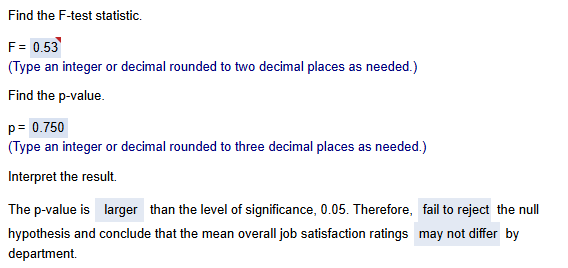

# QUESTIOn 10

a. Write the hypotheses for the​ chi-square test for independence. 

Upper H 0​:  gender and visiting an urgent care facility are independent

Upper H 1​:  gender and visiting an urgent care facility are dependent

In [91]:
import pandas as pd
import numpy as np
from io import StringIO

# Define the data as a multi-line string
data_string = """
Visited_Urgent_Care	Female	Male
No	16	6
Yes	3	7
"""

# Read the data into a pandas DataFrame
data = pd.read_csv(StringIO(data_string), sep='\t')

# Calculate row totals, column totals, and grand total
data['Total'] = data['Female'] + data['Male']
row_totals = data['Total']
column_totals = data[['Female', 'Male']].sum()
grand_total = row_totals.sum()

# Calculate expected frequencies
expected = pd.DataFrame(index=data['Visited_Urgent_Care'], columns=['Female', 'Male'])
for row in data['Visited_Urgent_Care']:
    for col in ['Female', 'Male']:
        expected.loc[row, col] = (column_totals[col] * data.loc[data['Visited_Urgent_Care'] == row, 'Total'].values[0]) / grand_total

# Round expected frequencies to two decimal places
expected = expected.astype(float).round(2)

# Add Grand Total to expected frequencies
expected['Total'] = expected['Female'] + expected['Male']

# Calculate Grand Total for expected frequencies
expected.loc['Grand Total'] = expected.sum()

# Display the expected frequencies
print("Expected Frequencies:")
print(expected)


Expected Frequencies:
                     Female   Male  Total
Visited_Urgent_Care                      
No                    13.06   8.94   22.0
Yes                    5.94   4.06   10.0
Grand Total           19.00  13.00   32.0


In [92]:

# Calculate chi-square statistic
chi_square = 0
for index, row in data.iterrows():
    row_label = row['Visited_Urgent_Care']
    for col in ['Female', 'Male']:
        observed = row[col]
        exp = expected.loc[row_label, col]
        chi_square += (observed - exp)**2 / exp

# Round chi-square statistic to two decimal places
chi_square = round(chi_square, 2)

print(f"Chi-Square Statistic (χ²): {chi_square}")

# # Calculate p-value
# df = (len(data) - 1) * (len(data.columns) - 2)  # df = (rows -1)*(cols -1) =1
# p_value = stats.chi2.sf(chi_square, df)
# p_value = round(p_value, 3)

# print(f"P-Value: {p_value}")

# # Interpretation
# alpha = 0.05
# if p_value <= alpha:
#     conclusion = "Reject the null hypothesis. There is evidence that gender and visiting an urgent care facility are dependent."
# else:
#     conclusion = "Fail to reject the null hypothesis. There is no evidence that gender and visiting an urgent care facility are dependent."

# print(f"\nConclusion: {conclusion}")

Chi-Square Statistic (χ²): 5.21


In [93]:
# Calculate chi-square statistic
chi_square = 0
for index, row in data.iterrows():
    row_label = row['Visited_Urgent_Care']
    for col in ['Female', 'Male']:
        observed = row[col]
        exp = expected.loc[row_label, col]
        chi_square += (observed - exp)**2 / exp

# Round chi-square statistic to two decimal places
chi_square = round(chi_square, 2)

print(f"Chi-Square Statistic (χ²): {chi_square}\n")

# Determine degrees of freedom
# df = (number of rows -1) * (number of columns -1)
# Here, rows = 2 (No, Yes), columns = 2 (Female, Male)
df = (2 - 1) * (2 - 1)  # 1

# Find the chi-square critical value for alpha=0.05 and df=1
alpha = 0.05
chi_square_critical = stats.chi2.ppf(1 - alpha, df)
chi_square_critical = round(chi_square_critical, 3)

print(f"Chi-Square Critical Value at α = {alpha}: {chi_square_critical}\n")

# Calculate p-value
p_value = stats.chi2.sf(chi_square, df)
p_value = round(p_value, 3)

print(f"P-Value: {p_value}\n")

# Draw Conclusion
if chi_square > chi_square_critical:
    conclusion = "Reject the null hypothesis. There is evidence that gender and visiting an urgent care facility are dependent."
else:
    conclusion = "Fail to reject the null hypothesis. There is no evidence that gender and visiting an urgent care facility are dependent."

print(f"Conclusion: {conclusion}")


Chi-Square Statistic (χ²): 5.21

Chi-Square Critical Value at α = 0.05: 3.841

P-Value: 0.022

Conclusion: Reject the null hypothesis. There is evidence that gender and visiting an urgent care facility are dependent.


The test statistic 
does not exceed
 the critical​ value, and the​ p-value is 
greater than
 the chosen level of​ significance, 0.05.​ Therefore, 
fail to reject
 the null hypothesis and conclude that gender and visiting an urgent care facility in the last month are 
independent.

In [10]:
# ---------------------------------------
# Part d: Test for Equality of Variances Between Males and Females
# ---------------------------------------

# Perform Levene's Test for Equality of Variances between Males and Females
levene_stat_d, p_value_levene_d = stats.levene(males, females, center='mean')
levene_stat_d = round(levene_stat_d, 2)
p_value_levene_d = round(p_value_levene_d, 3)

print("Part d: Testing Equality of Variances Between Males and Females")
print("-------------------------------------------------------------")
print(f"Levene's Test Statistic: {levene_stat_d}")
print(f"P-Value: {p_value_levene_d}\n")

# Conclusion
if p_value_levene_d <= alpha:
    conclusion_d = "Reject the null hypothesis. There is sufficient evidence to conclude that the variances of length of service for males and females are different."
else:
    conclusion_d = "Fail to reject the null hypothesis. There is insufficient evidence to conclude that the variances of length of service for males and females are different."

print(f"Conclusion: {conclusion_d}\n")

# ---------------------------------------
# Assessing Assumptions and Repeating Tests if Necessary
# ---------------------------------------

if p_value_levene_d > alpha:
    print("Assumption of equal variances is valid. No need to repeat the tests with unequal variances.\n")
else:
    print("Assumption of equal variances is NOT valid. Repeating the t-tests with unequal variances (Welch's t-test).\n")
    
    # Part a: Welch's t-test for Males vs Females
    t_stat_a_welch, p_value_a_welch = stats.ttest_ind(males, females, equal_var=False)
    p_value_a_welch = round(p_value_a_welch, 3)
    print("Welch's t-Test for Males vs Females")
    print("------------------------------------")
    print(f"Test Statistic (t): {t_stat_a_welch:.2f}")
    print(f"P-Value: {p_value_a_welch}\n")
    
    # Conclusion
    if p_value_a_welch <= alpha:
        conclusion_a_welch = "Reject the null hypothesis. There is sufficient evidence to conclude that the average length of service for males is different from females."
    else:
        conclusion_a_welch = "Fail to reject the null hypothesis. There is insufficient evidence to conclude that the average length of service for males is different from females."
    
    print(f"Conclusion: {conclusion_a_welch}\n")
    
    # Similarly, you can perform Welch's t-test for parts b and c if needed.


Part d: Testing Equality of Variances Between Males and Females
-------------------------------------------------------------
Levene's Test Statistic: 1.03
P-Value: 0.314

Conclusion: Fail to reject the null hypothesis. There is insufficient evidence to conclude that the variances of length of service for males and females are different.

Assumption of equal variances is valid. No need to repeat the tests with unequal variances.



In [94]:
import pandas as pd
import numpy as np
from scipy import stats
from io import StringIO

# Define the data as a multi-line string
data_string = """
Gender	Married?	Undergraduate_GPA	Plan_to_attend_graduate_school
M	Y	2.9	Yes
M	N	3.1	Yes
M	Y	3	Yes
M	Y	3.5	No
M	N	3.2	Yes
M	N	3.7	Yes
M	Y	2.8	Yes
M	N	2.6	No
M	Y	3.3	No
M	N	3.3	Yes
M	N	3.5	No
M	N	3.2	Yes
M	N	2.9	No
M	N	4	No
M	N	4	Yes
F	N	3.6	No
F	N	3.3	Yes
F	Y	2.9	Yes
F	N	3.4	Yes
F	N	3	Yes
F	N	3.2	Yes
F	Y	4	Yes
F	Y	3	Yes
F	N	2.5	No
F	Y	4	Yes
F	N	4	Yes
F	N	2.7	Yes
F	N	3.7	No
F	N	3.2	No
F	Y	2.8	Yes
"""

# Read the data into a pandas DataFrame
data = pd.read_csv(StringIO(data_string), sep='\t')

# Create contingency table
contingency_table = pd.crosstab(data['Gender'], data['Plan_to_attend_graduate_school'])

print("Contingency Table:")
print(contingency_table, "\n")

# Perform Chi-Square Test for Independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Round the chi-square statistic and p-value
chi2_rounded = round(chi2, 2)
p_rounded = round(p, 3)

print(f"Chi-Square Statistic (χ²): {chi2_rounded}")
print(f"P-Value: {p_rounded}\n")

# Conclusion
alpha = 0.05
if p <= alpha:
    conclusion = "Reject the null hypothesis. There is sufficient evidence to conclude that gender and plans to attend graduate school are dependent."
else:
    conclusion = "Fail to reject the null hypothesis. There is insufficient evidence to conclude that gender and plans to attend graduate school are dependent."

print(f"Conclusion: {conclusion}")


Contingency Table:
Plan_to_attend_graduate_school  No  Yes
Gender                                 
F                                4   11
M                                6    9 

Chi-Square Statistic (χ²): 0.15
P-Value: 0.699

Conclusion: Fail to reject the null hypothesis. There is insufficient evidence to conclude that gender and plans to attend graduate school are dependent.
